# Tarea - Ajuste de curvas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [3]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [160]:
i = np.arange(27)
df =pd.DataFrame(index=i,columns=["Año", "Costo electricidad"])
df["Año"]= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
            16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27] #1 =2014 y 27 año 2040
df["Costo electricidad"]= [10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149]
df.head(6)

,Año,Costo electricidad
0,1,10.051101
1,2,9.259127
2,3,9.444813
3,4,9.557723
4,5,9.977324
5,6,10.298326


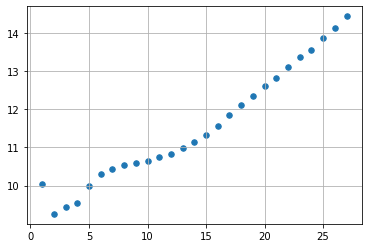

In [161]:
x= df["Año"]
y= df["Costo electricidad"]
plt.figure()
plt.scatter(x,y, s=30)
plt.grid()

In [162]:
df["Costo electricidad"].min()

9.259127

In [163]:
data.shape

(66, 4)

In [164]:
def funcion_de_costo_1(theta,x,y):
    prediccion = (theta[0] + theta[1]*x)
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_costo_1,theta_inicial_1,args=(x, y))

costo_1 = sol.fun
resultados_1 = sol.x
sol

      fun: 2.3704889518157075
 hess_inv: array([[ 0.07834758, -0.0042735 ],
       [-0.0042735 ,  0.00030525]])
      jac: array([1.19209290e-07, 3.57627869e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([8.92900583, 0.18667055])

In [165]:
def funcion_de_costo_2(theta,x,y):
    prediccion = (theta[0] + theta[1]*x + theta[2]*x**2)
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_de_costo_2,
                   theta_inicial_2,
                   args=(x, y))

costo_2 = sol.fun
resultados_2 = sol.x
sol

      fun: 0.8443845212975816
 hess_inv: array([[ 1.94017093e-01, -2.82051280e-02,  8.54700848e-04],
       [-2.82051280e-02,  5.25662074e-03, -1.76834658e-04],
       [ 8.54700848e-04, -1.76834658e-04,  6.31552352e-06]])
      jac: array([-1.86264515e-07, -6.33299351e-07, -4.91738319e-07])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([9.52314623e+00, 6.37449477e-02, 4.39020017e-03])

In [166]:
def funcion_de_costo_3(theta,x,y):
    prediccion = (theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3)
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_de_costo_3,
                    theta_inicial_3,
                    args=(x, y))
#los argumentos son los que estan después de theta en la funcion de costo
costo_3 = sol.fun
resultados_3 = sol.x
sol

      fun: 0.8404497314382697
 hess_inv: array([[ 3.96438577e-01, -1.07811074e-01,  7.83476187e-03,
        -1.66191879e-04],
       [-1.07811074e-01,  3.65626790e-02, -2.92182468e-03,
         6.53568399e-05],
       [ 7.83476187e-03, -2.92182468e-03,  2.47001771e-04,
        -5.73060200e-06],
       [-1.66191879e-04,  6.53568399e-05, -5.73060200e-06,
         1.36442050e-07]])
      jac: array([ 0.00000000e+00, -7.45058060e-09,  7.45058060e-09,  8.19563866e-08])
  message: 'Optimization terminated successfully.'
     nfev: 100
      nit: 10
     njev: 20
   status: 0
  success: True
        x: array([9.48692553e+00, 7.79893819e-02, 3.14121002e-03, 2.97378618e-05])

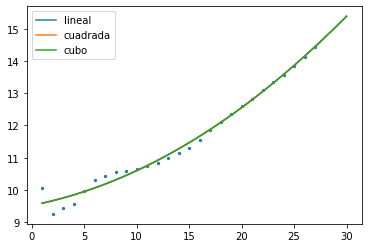

In [167]:
xn= np.linspace(1,30,200)
yn1 = resultados_1[0]+ resultados_1[1]*xn
yn2 = resultados_2[0]+ resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0]+ resultados_3[1]*xn + resultados_3[2]*xn**2  + resultados_3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y, s=5)
plt.plot(xn, yn2, label= "lineal")
plt.plot(xn, yn2, label= "cuadrada")
plt.plot(xn, yn2, label= "cubo")
plt.legend(loc="best")

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

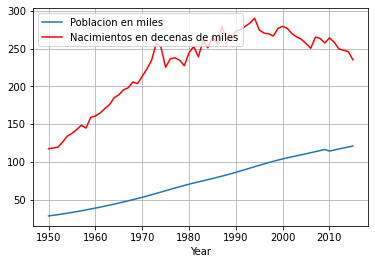

In [221]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

In [263]:
data = pd.read_csv("population_data.csv")
data.head()

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752


## Regresión lineal 

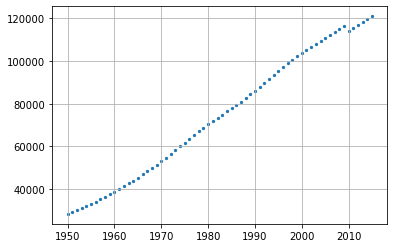

In [264]:
x= data["Year"]-1950
y= data["Poblacion"]
plt.figure()
plt.scatter(x + 1950,y,s=5)
plt.grid()

---

In [265]:
def funcion_de_costo_1(theta, x, y) :
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_costo_1,
                   theta_inicial_1,
                   args=(x, y))
#los argumentos son los que estan después de theta en la función de costo
costo_1 = sol.fun
resultados_1 = sol.x
sol

      fun: 212137169.56280482
 hess_inv: array([[ 9.79029560e-03, -2.23319816e-04],
       [-2.23319816e-04,  1.04379124e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 69
      nit: 9
     njev: 23
   status: 0
  success: True
        x: array([24137.98270496,  1543.97415565])

In [267]:
def funcion_de_costo_2(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_de_costo_2,
                   theta_inicial_2,
                   args=(x, y))
#los argumentos son los que estan después de theta en la función de costo
costo_2 = sol.fun
resultados_2 = sol.x
sol

      fun: 210941621.45650625
 hess_inv: array([[ 1.05731280e-01, -6.42864382e-03,  8.16151797e-05],
       [-6.42864382e-03,  4.76291987e-04, -6.59258122e-06],
       [ 8.16151797e-05, -6.59258122e-06,  9.61869271e-08]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([2.44256281e+04, 1.51701096e+03, 4.14800919e-01])

In [269]:
def funcion_de_costo_3(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_de_costo_3,
                   theta_inicial_3,
                   args=(x, y))

costo_3 = sol.fun
resultados_3 = sol.x
sol

      fun: 25240442.63793197
 hess_inv: array([[ 1.12078943e-05, -2.34607488e-05,  1.12834738e-06,
        -1.25118888e-08],
       [-2.34607488e-05,  4.95749765e-04, -2.26683549e-05,
         2.42146803e-07],
       [ 1.12834738e-06, -2.26683549e-05,  1.11100927e-06,
        -1.23995501e-08],
       [-1.25118888e-08,  2.42146803e-07, -1.23995501e-08,
         1.42603145e-10]])
      jac: array([0.  , 0.5 , 0.  , 0.75])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 367
      nit: 8
     njev: 71
   status: 2
  success: False
        x: array([ 2.84777405e+04,  7.39081040e+02,  3.05648144e+01, -3.09231352e-01])

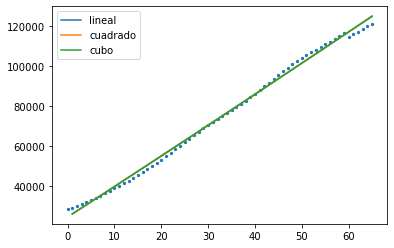

In [270]:
xn= np.linspace(1,65,100)
yn1 = resultados_1[0]+ resultados_1[1]*xn
yn2 = resultados_2[0]+ resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0]+ resultados_3[1]*xn + resultados_3[2]*xn**2 +  resultados_3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y, s=5)
plt.plot(xn, yn2, label= "lineal")
plt.plot(xn, yn2, label= "cuadrado")
plt.plot(xn, yn2, label= "cubo")
plt.legend(loc="best")

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

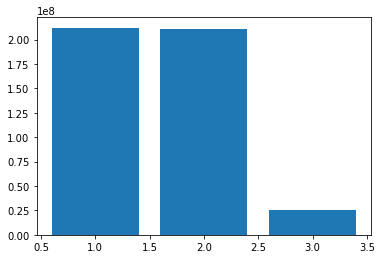

In [271]:
plt.figure()
plt.bar([1,2,3],[costo_1,costo_2,costo_3])
plt.grid

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [272]:
data_problema_2 = pd.read_csv("population_data.csv")
data_problema_2.head()

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752


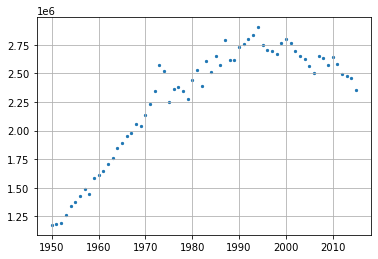

In [273]:
x= data_problema_2["Year"]-1950
y= data_problema_2["Nacimientos"]
plt.figure()
plt.scatter(x + 1950,y,s=5)
plt.grid()

In [274]:
def funcion_de_costo_1(theta, x, y) :
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_costo_1,
                   theta_inicial_1,
                   args=(x, y))
#los argumentos son los que estan después de theta en la función de costo
costo_1 = sol.fun
resultados_1 = sol.x
sol

      fun: 4737915727643.264
 hess_inv: array([[ 3.03139803e-02, -6.93189577e-04],
       [-6.93189577e-04,  2.11923581e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 5
     njev: 14
   status: 0
  success: True
        x: array([1563444.44718747,   21966.38495936])

In [275]:
def funcion_de_costo_2(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_de_costo_2,
                   theta_inicial_2,
                   args=(x, y))
#los argumentos son los que estan después de theta en la función de costo
costo_2 = sol.fun
resultados_2 = sol.x
sol

      fun: 492921158544.68695
 hess_inv: array([[ 6.52186680e-02, -4.00389857e-03,  5.09780532e-05],
       [-4.00389857e-03,  3.30185402e-04, -4.73452237e-06],
       [ 5.09780532e-05, -4.73452237e-06,  7.24330869e-08]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 72
      nit: 9
     njev: 18
   status: 0
  success: True
        x: array([ 1.02098976e+06,  7.27850263e+04, -7.81651650e+02])

In [277]:
def poblema2_3(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_de_costo_3,
                   theta_inicial_3,
                   args=(x, y))

costo_3 = sol.fun
resultados_3 = sol.x
sol

      fun: 441782517635.8472
 hess_inv: array([[ 2.10661292e-11,  3.29018094e-11, -5.14168844e-11,
         3.03874940e-12],
       [ 3.29018094e-11,  5.59883635e-11, -8.37026365e-11,
         5.33071870e-12],
       [-5.14168844e-11, -8.37026365e-11,  1.28337095e-10,
        -7.78385662e-12],
       [ 3.03874940e-12,  5.33071870e-12, -7.78385662e-12,
         9.63099864e-13]])
      jac: array([-8192., -8192., -8192., 16384.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 937
      nit: 67
     njev: 184
   status: 2
  success: False
        x: array([ 1.08815363e+06,  5.98869767e+04, -2.81734958e+02, -5.12746242e+00])

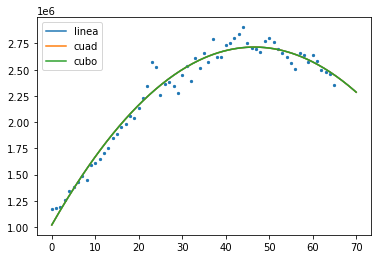

In [278]:
xn= np.linspace(0,70,200)
yn1 = resultados_1[0]+ resultados_1[1]*xn
yn2 = resultados_2[0]+ resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0]+ resultados_3[1]*xn + resultados_3[2]*xn**2 + + resultados_3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y, s=5)
plt.plot(xn, yn2, label= "linea")
plt.plot(xn, yn2, label= "cuad")
plt.plot(xn, yn2, label= "cubo")
plt.legend(loc="best")

---

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

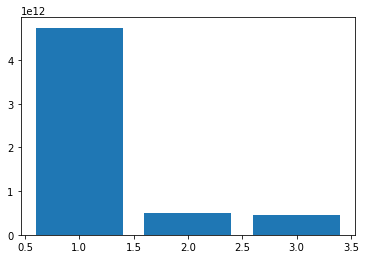

In [279]:
plt.figure()
plt.bar([1,2,3],[costo_1,costo_2,costo_3])
plt.grid